In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df =pd. read_csv(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\data\interim\cleaned_day2.csv")
df["InvoiceDate"]= pd.to_datetime(df["InvoiceDate"])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#Exploratory Data Analysis
Goal:
 - Understand sales distributions
 - Identify Patterns
 - Discover relationships
 - Generate business insights

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


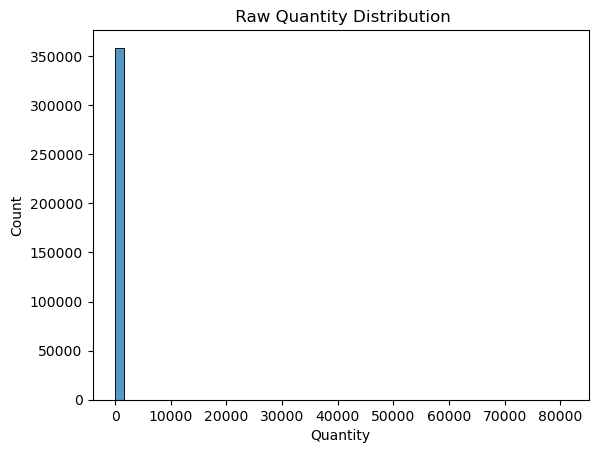

In [51]:
plt.figure()
sns.histplot(df["Quantity"], bins =50)
plt.title(" Raw Quantity Distribution")
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Raw_Quantity distribution.png")
plt.show()

In [4]:
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Filter data within IQR bounds
data = df.loc[ df['Quantity'] >= upper]
len(data)
#top_10_outliers = data.sort_values(by='Quantity', ascending= False).head(10)
#top_10_outliers

25401

In [5]:
unique_quantities = df['Quantity'].unique()
unique_quantities

array([    6,     8,    32,     3,    24,    12,    48,    18,    20,
          36,    80,     2,     4,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,   160,  2880,  1400,    19,    39,    56,
          13,  1440,    15,   720,   324,    41,   402,   378,   150,
         300,    22,    34,   408,   972,   208,  1008,    26,  1000,
        1488,   250,  1394,   400,   110,    37,    78,    84,    47,
          21,  1728,    38,    53,    76,   576,    29,  2400,   500,
         180,   960,  1296,   147,   168,   256,    54,    31,   860,
        1010,  1356,  1284,   114,   360,  1930,  2000,  3114,  1300,
         670,   176,   648,    62, 74215,    89,    33,    46,   112,
         456,   900,

In [6]:
a = df.loc[ df['Quantity']<=0]
a

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue


## Quantity Distribution (Raw Data)

- Quantity distribution is highly right-skewed.
- Most transactions involve small quantities.
- Few transactions show very large quantities representing bulk purchases.
- Extreme values represent real business behavior rather than data errors.


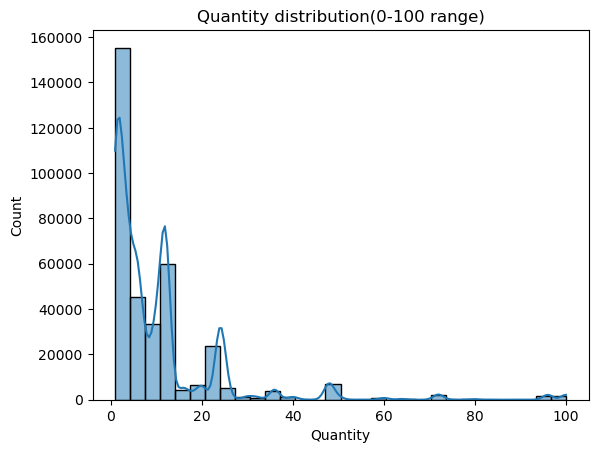

In [52]:
small_qty = df[df["Quantity"]<=100]
plt.figure()
sns.histplot(small_qty["Quantity"], bins =30 ,kde=True)
#plt.xlim(0,100)
plt.title("Quantity distribution(0-100 range)")
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Quantity_distribution(0-100 range).png")
plt.show()

Most purchases occur within small quantity ranges (0–100 units).


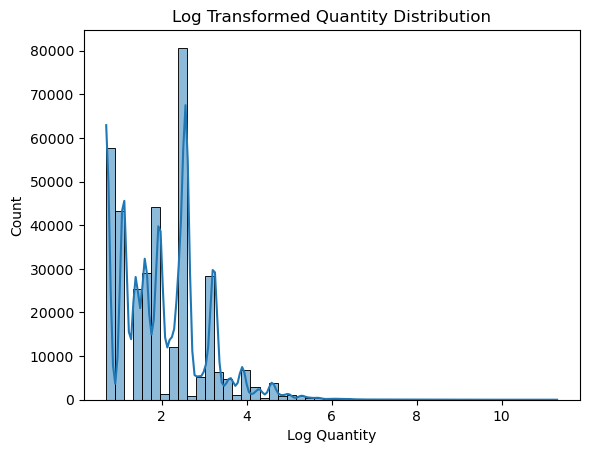

In [55]:
import numpy as np

# Create a new column with the log values
df['Log_Quantity'] = np.log1p(df['Quantity'])

plt.figure()
sns.histplot(df["Log_Quantity"],bins =50,kde=True)
plt.title("Log Transformed Quantity Distribution")
plt.xlabel("Log Quantity")
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Log_transformed_quantity_distribution.png") 
plt.show()

## Log Transformed Quantity Distribution

- Log transformation reduces extreme skewness in Quantity.
- It compresses large values and spreads smaller values.
- This improves visualization and analysis of purchase behavior.
- Original Quantity values are retained for business interpretation.


In [10]:
df[["Quantity","Log_Quantity"]].head()


,Quantity,Log_Quantity
0,6,1.945910
1,6,1.945910
2,8,2.197225
3,6,1.945910
4,6,1.945910


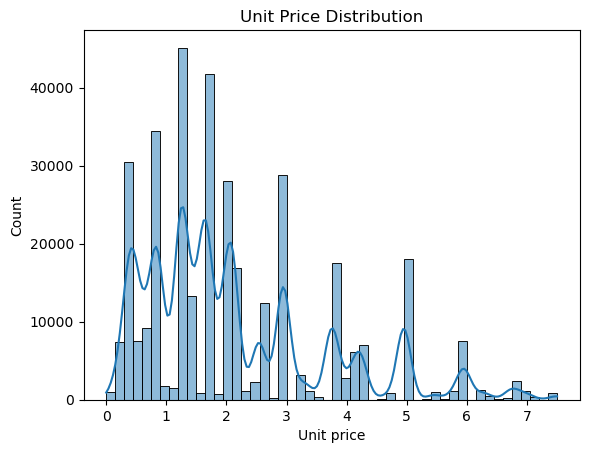

In [56]:
plt.figure()
sns.histplot(df["UnitPrice"],bins =50, kde=True)
plt.title("Unit Price Distribution")
plt.xlabel("Unit price")
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Unit_price_distribution.png")
plt.show()

In [16]:
f= df.loc[df["UnitPrice"].idxmax()]
f

InvoiceNo                             538638
StockCode                              90078
Description     PINK/WHITE GLASS DEMI CHOKER
Quantity                                   2
InvoiceDate              2010-12-13 14:16:00
UnitPrice                                7.5
CustomerID                           17231.0
Country                       United Kingdom
Revenue                                 15.0
Log_Quantity                        1.098612
Name: 16113, dtype: object

## Unit Price Distribution

- UnitPrice distribution is right-skewed.
- Most products are low priced.
- Few products have very high prices.
- This indicates wide product price variation in the retail store.


In [17]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Log_Quantity'],
      dtype='object')

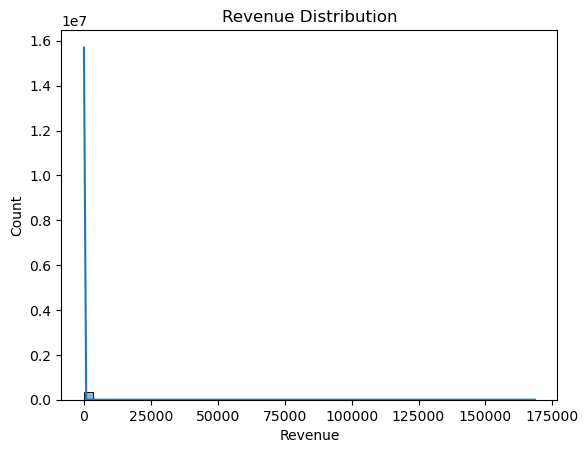

In [57]:
plt.figure()
sns.histplot(df["Revenue"],bins=50,kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Raw_revenue_distribution.png")
plt.show()

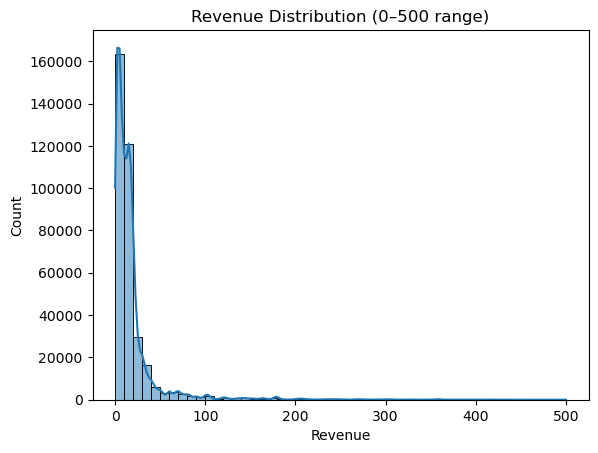

In [58]:
small_revenue = df[df["Revenue"] <= 500]

plt.figure()
sns.histplot(small_revenue["Revenue"], bins=50, kde=True)
plt.title("Revenue Distribution (0–500 range)")
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Revenue_distribution(0-500).png")
plt.show()


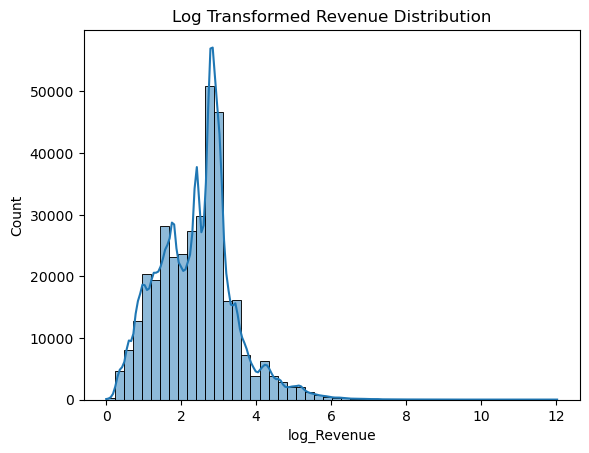

In [59]:
import numpy as np

df["log_Revenue"] = np.log1p(df["Revenue"])

plt.figure()
sns.histplot(df["log_Revenue"], bins=50, kde=True)
plt.title("Log Transformed Revenue Distribution")
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Log_transformedrevenue_distribution.png")
plt.show()


## Revenue Distribution

- Revenue distribution is highly right-skewed.
- Most transactions generate low revenue.
- Few transactions generate very high revenue due to bulk purchases.
- Log transformation improves visualization of revenue distribution.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358620 entries, 0 to 358619
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     358620 non-null  int64         
 1   StockCode     358620 non-null  object        
 2   Description   358620 non-null  object        
 3   Quantity      358620 non-null  int64         
 4   InvoiceDate   358620 non-null  datetime64[ns]
 5   UnitPrice     358620 non-null  float64       
 6   CustomerID    358620 non-null  float64       
 7   Country       358620 non-null  object        
 8   Revenue       358620 non-null  float64       
 9   Log_Quantity  358620 non-null  float64       
 10  log_Revenue   358620 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 30.1+ MB


In [24]:
df["Month"] = df["InvoiceDate"].dt.to_period("M")


In [25]:
df[["InvoiceDate", "Month"]].head()


,InvoiceDate,Month
0,2010-12-01 08:26:00,2010-12
1,2010-12-01 08:26:00,2010-12
2,2010-12-01 08:26:00,2010-12
3,2010-12-01 08:26:00,2010-12
4,2010-12-01 08:26:00,2010-12


In [26]:
monthly_revenue = df.groupby("Month")["Revenue"].sum()
monthly_revenue

Month
2010-12     480348.950
2011-01     495617.730
2011-02     379688.280
2011-03     492847.050
2011-04     394154.691
2011-05     563858.370
2011-06     532562.600
2011-07     518686.871
2011-08     564883.850
2011-09     849232.132
2011-10     881896.710
2011-11    1013999.300
2011-12     477047.770
Freq: M, Name: Revenue, dtype: float64

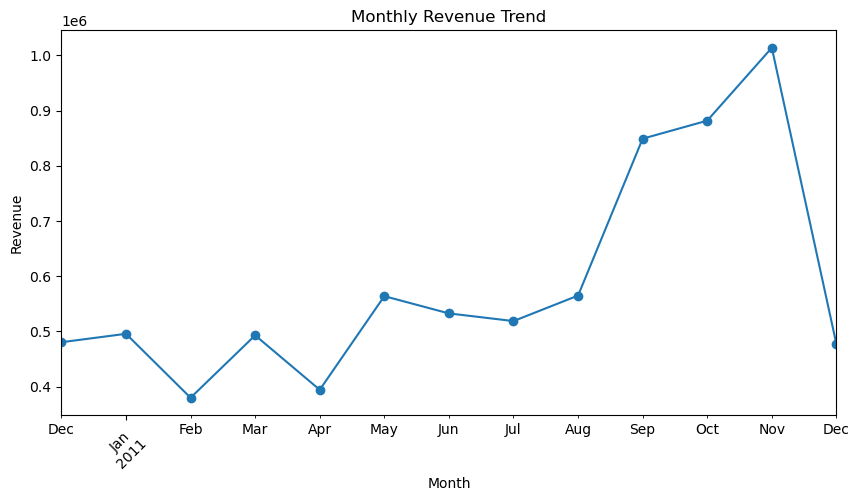

In [60]:
plt.figure(figsize=(10,5))
monthly_revenue.plot(marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Monthly_revenue_trend.png")
plt.show()


## Monthly Revenue Trend

- Revenue varies across different months.
- The trend indicates possible seasonal demand patterns.
- Sales performance fluctuates over time reflecting customer purchasing behavior.


In [29]:
country_revenue = df.groupby("Country")["Revenue"].sum().sort_values(ascending = False)
country_revenue

Country
United Kingdom          6334870.804
Netherlands              266830.640
EIRE                     213121.390
Germany                  174099.750
France                   162311.060
Australia                126161.760
Spain                     47124.960
Switzerland               45040.950
Sweden                    36568.430
Japan                     35897.470
Belgium                   31353.250
Norway                    27446.640
Portugal                  24435.970
Finland                   16361.280
Channel Islands           15050.440
Denmark                   13375.440
Italy                     13127.490
Cyprus                     9497.160
Singapore                  7928.390
Austria                    7658.830
Poland                     5567.000
Israel                     5518.040
Iceland                    3981.150
Greece                     3465.430
USA                        3359.990
Canada                     2899.740
Unspecified                2201.620
Lithuania           

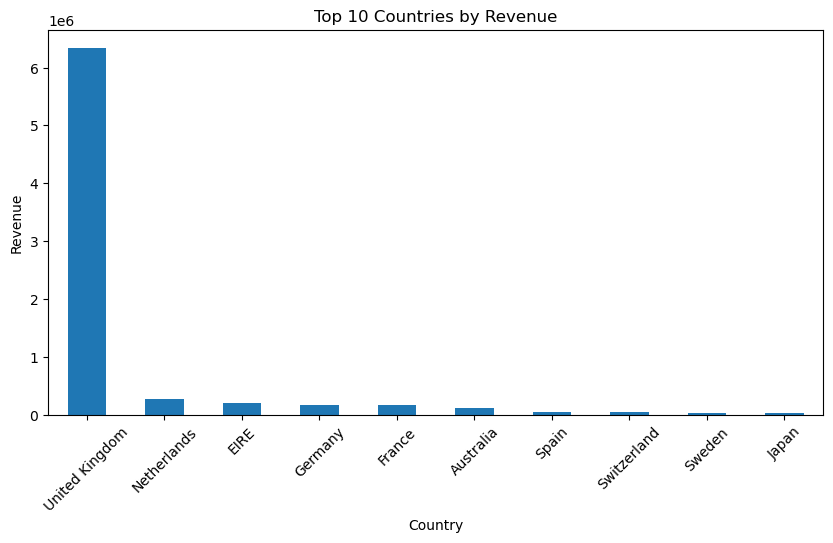

In [61]:
top_countries = country_revenue.head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind = "bar")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation = 45)
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Top_10_countries_by_revenue.png")
plt.show()

In [33]:
country_percent = (country_revenue / country_revenue.sum()) * 100
country_percent.head(10)


Country
United Kingdom    82.864832
Netherlands        3.490344
EIRE               2.787787
Germany            2.277354
France             2.123150
Australia          1.650290
Spain              0.616430
Switzerland        0.589169
Sweden             0.478342
Japan              0.469566
Name: Revenue, dtype: float64

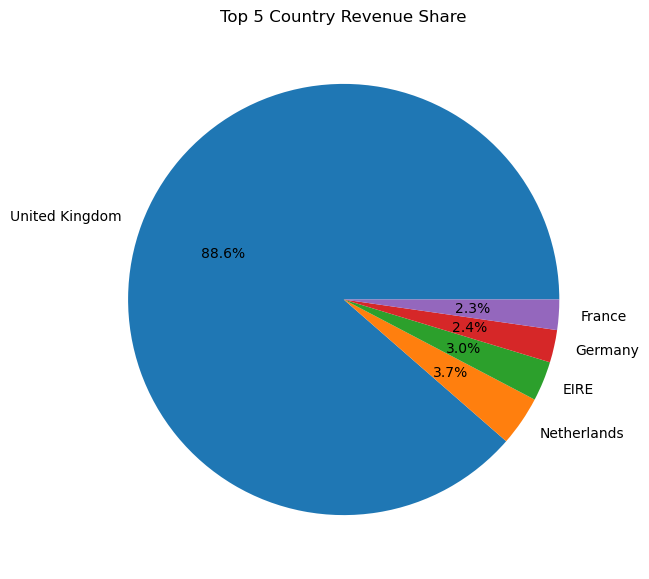

In [34]:
plt.figure(figsize=(7,7))
country_percent.head(5).plot(kind="pie", autopct="%1.1f%%")
plt.title("Top 5 Country Revenue Share")
plt.ylabel("")
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Top5_country_revenue_share.png")
plt.show()


## Country Revenue Analysis

- Revenue is concentrated in a few countries.
- United Kingdom contributes the highest share of revenue.
- Sales distribution shows strong geographical concentration.
- Other countries contribute smaller portion of total revenue.


In [36]:
product_sales = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False)
product_sales.head()

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
Name: Quantity, dtype: int64

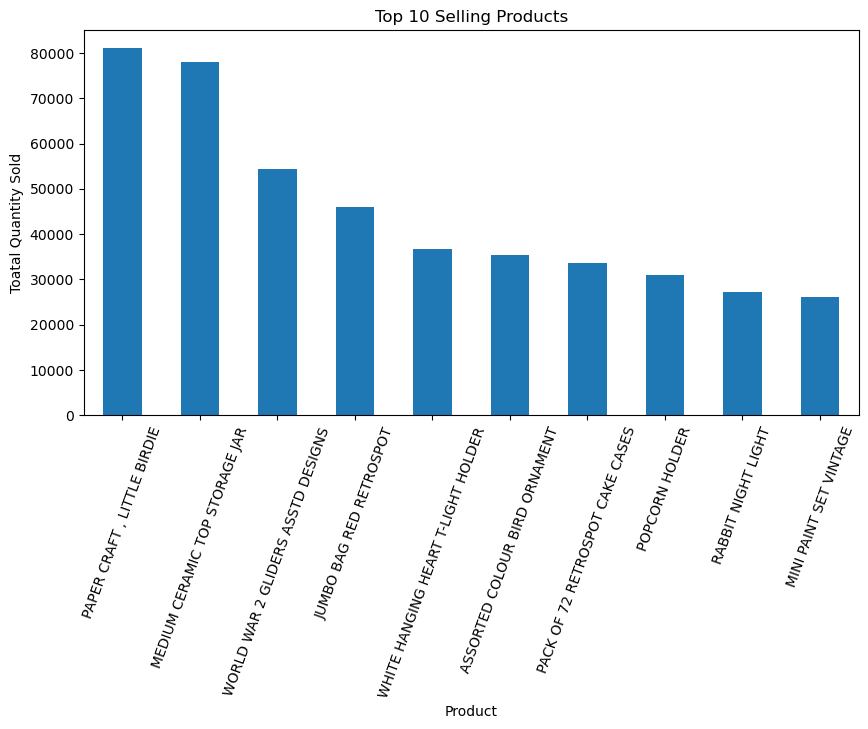

In [62]:
top_products = product_sales.head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind = "bar")
plt.title("Top 10 Selling Products")
plt.xlabel("Product")
plt.ylabel("Toatal Quantity Sold")
plt.xticks(rotation =70)
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Top_10_selling_products.png")
plt.show()

In [42]:
product_revenue = df.groupby("Description")["Revenue"].sum().sort_values(ascending=False)

product_revenue.head(10)


Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
PARTY BUNTING                          68655.75
ASSORTED COLOUR BIRD ORNAMENT          56413.03
RABBIT NIGHT LIGHT                     51251.24
CHILLI LIGHTS                          46078.21
PAPER CHAIN KIT 50'S CHRISTMAS         42584.13
BLACK RECORD COVER FRAME               39045.80
Name: Revenue, dtype: float64

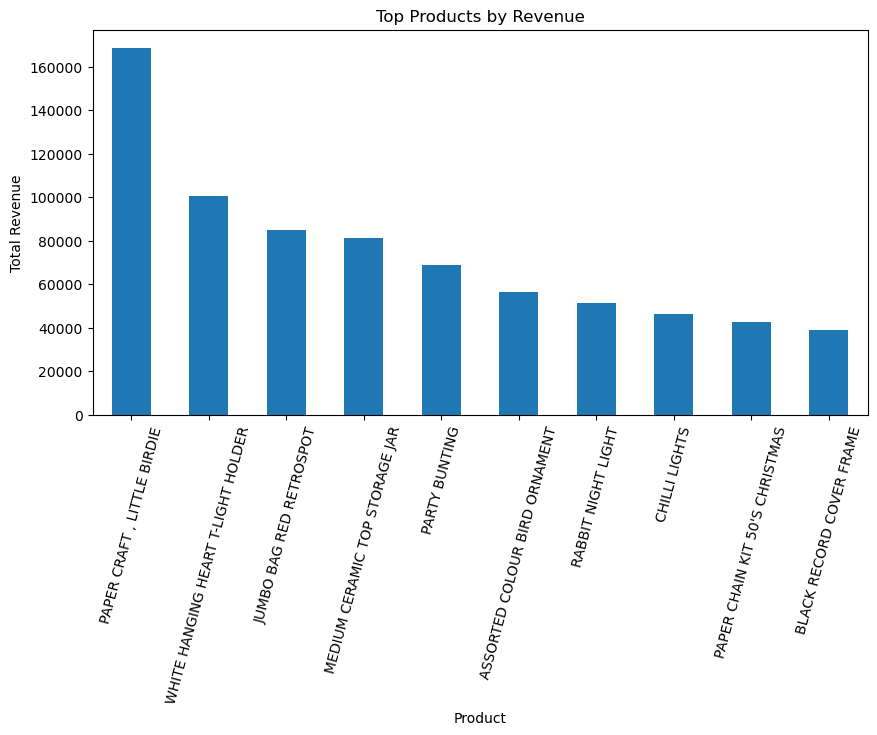

In [63]:
top_product_revenue = product_revenue.head(10)

plt.figure(figsize= (10,5))
top_product_revenue.plot(kind ="bar")
plt.title("Top Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.xticks(rotation = 75)
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Top_products_by_revenue.png") 
plt.show()

## Product Revenue Analysis

- "PAPER CRAFT, LITTLE BIRDIE" generates the highest revenue among all products.
- A few products contribute significantly more revenue compared to others.
- Revenue contribution is highly concentrated among top-selling products.
- Decorative and gift-related items (lights, ornaments, storage jars) appear frequently among top revenue generators.
- This indicates that a small set of popular products drives a large portion of overall sales.



In [46]:
df[["Quantity", "UnitPrice", "Revenue"]].corr()


,Quantity,UnitPrice,Revenue
Quantity,1.000000,-0.030237,0.932669
UnitPrice,-0.030237,1.000000,0.017520
Revenue,0.932669,0.017520,1.000000


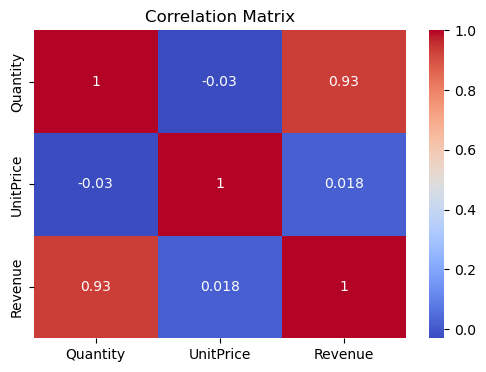

In [64]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Quantity", "UnitPrice", "Revenue"]].corr(),
            annot=True,
            cmap="coolwarm")

plt.title("Correlation Matrix")
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Correlation_matrix.png")
plt.show()


## Correlation Analysis

- Revenue shows a very strong positive correlation with Quantity (0.93).
- This indicates that revenue is mainly driven by the number of products purchased.
- UnitPrice shows almost no correlation with Revenue (0.018), suggesting price variation has minimal direct impact on transaction revenue.
- Quantity and UnitPrice show very weak negative correlation (-0.03), indicating no significant relationship between product price and purchase quantity.
- Overall, purchase volume is the primary driver of revenue in this retail dataset.


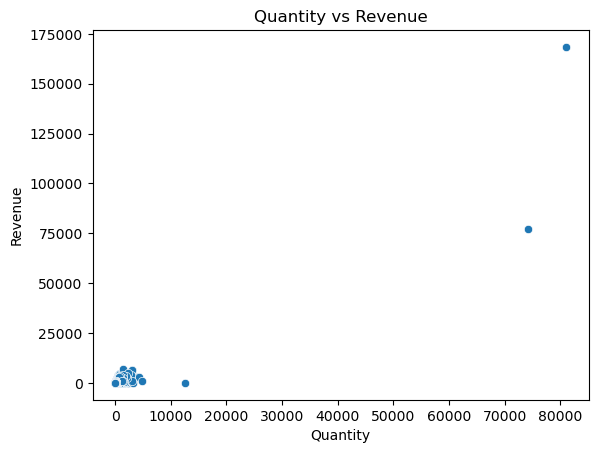

In [65]:
plt.figure()
sns.scatterplot(x=df["Quantity"], y=df["Revenue"])
plt.title("Quantity vs Revenue")
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Quantity_vs_revenue.png")
plt.show()


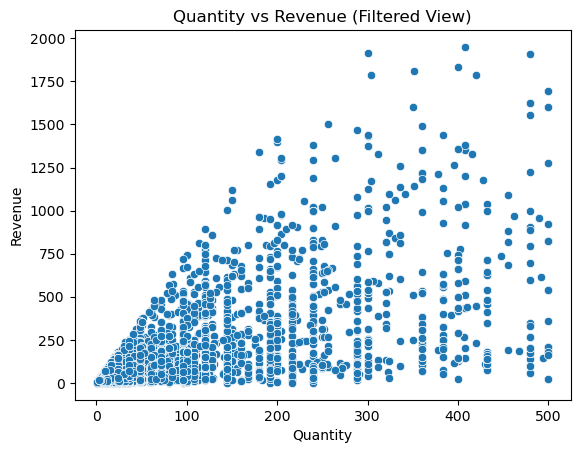

In [67]:
small_df = df[(df["Quantity"] <= 500) & (df["Revenue"] <= 2000)]

sns.scatterplot(x=small_df["Quantity"], y=small_df["Revenue"])
plt.title("Quantity vs Revenue (Filtered View)")
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\Quantity_vs_revenue(fitered_view).png")
plt.show()


## Quantity vs Revenue Relationship

- The scatter plot shows a strong positive relationship between Quantity and Revenue.
- As the quantity purchased increases, revenue also increases significantly.
- Most transactions involve low quantity and low revenue values.
- A few transactions show extremely high quantity and revenue, representing bulk purchases.
- This confirms that purchase volume is the main driver of revenue in the dataset.


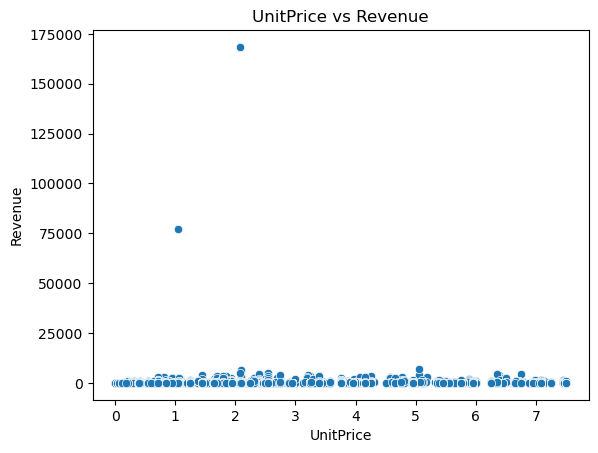

In [66]:
plt.figure()
sns.scatterplot(x=df["UnitPrice"], y=df["Revenue"])
plt.title("UnitPrice vs Revenue")
plt.savefig(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\reports\figures\UnitPrice_vs_revenue.png")
plt.show()


## UnitPrice vs Revenue Relationship

- The scatter plot shows no strong relationship between UnitPrice and Revenue.
- Revenue values remain mostly low across different price levels.
- Data points are widely scattered, indicating weak correlation between product price and transaction revenue.
- A few high-revenue transactions are visible but do not show a consistent pattern with UnitPrice.
- This suggests that revenue is not primarily influenced by product price but by purchase quantity.


## Overall Insight

- Purchase quantity is the most important factor influencing revenue.
- Product price has limited direct impact on transaction revenue.
- Bulk purchases contribute significantly to overall sales performance.